In [25]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import mplhep
import awkward as ak
import pandas as pd
import seaborn as sns

mplhep.style.use(["LHCbTex2"])
plt.rcParams["savefig.dpi"] = 600
# %matplotlib inline

In [26]:
tree = uproot.open({
    "/work/cetin/LHCb/reco_tuner/data_matching/parameterisations/sample4/param_data_B_default_thesis_selected.root":
    "Selected"
})
allcols = tree.arrays()
allcols = allcols[allcols.isElectron == 1]

In [27]:
zMagnetParamsEndT = [
    5283.043384741342,
    28.45437483916609,
    0.016308934185688337,
    -1668.3602223088105,
    301.07580662497,
]
dSlope_xEndT = allcols.tx_l11 - allcols.tx
dSlope_xEndT_abs = abs(dSlope_xEndT)
x_EndT_abs = abs(allcols.x_l11 + allcols.tx_l11 * (9410.0 - allcols.z_l11))

zMagTerm = zMagnetParamsEndT[0] + zMagnetParamsEndT[3] * allcols.tx * allcols.tx

z_mag_xEndT = (
    zMagTerm + dSlope_xEndT_abs *
    (zMagnetParamsEndT[1] + zMagnetParamsEndT[4] * dSlope_xEndT_abs) +
    zMagnetParamsEndT[2] * x_EndT_abs)

In [28]:
zmag = (allcols["x"] - allcols["x_l11"] - allcols["tx"] * allcols["z"] +
        allcols["tx_l11"] * allcols["z_l11"]) / dSlope_xEndT

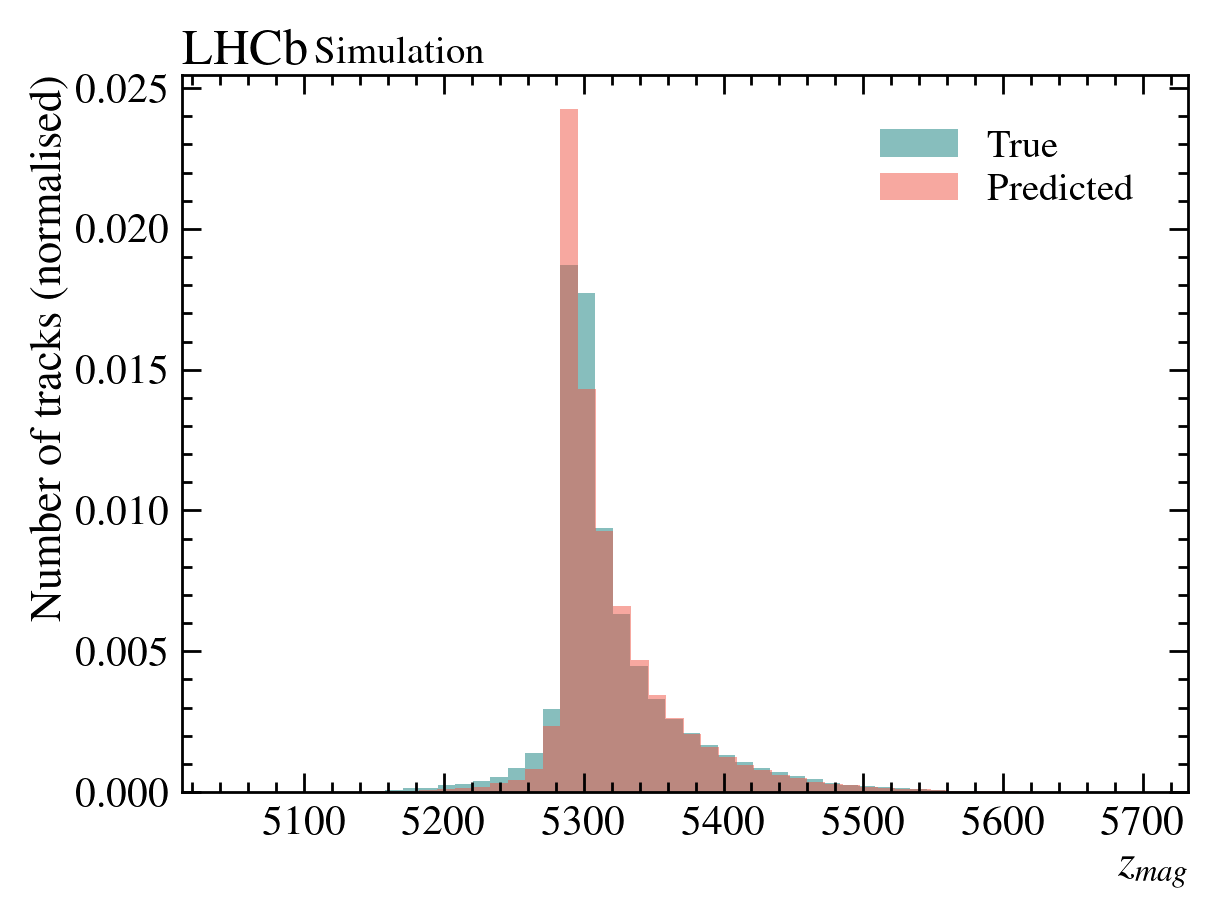

In [29]:
plt.hist(
    zmag,
    bins=50,
    alpha=0.5,
    density=True,
    color="#107E7D",
    label="True",
)
plt.hist(
    z_mag_xEndT,
    bins=50,
    alpha=0.5,
    density=True,
    color="#F05342",
    label="Predicted",
)
plt.xlabel(r"$z_{mag}$")
plt.ylabel("Number of tracks (normalised)")
mplhep.lhcb.text("Simulation", loc=0)
plt.legend(loc="upper right")
# plt.savefig(
#     "/work/cetin/LHCb/reco_tuner/thesis/zmag_new_parameterisation.pdf", format="PDF"
# )
plt.show()

In [35]:
weird = zmag < 5200
True in weird

True

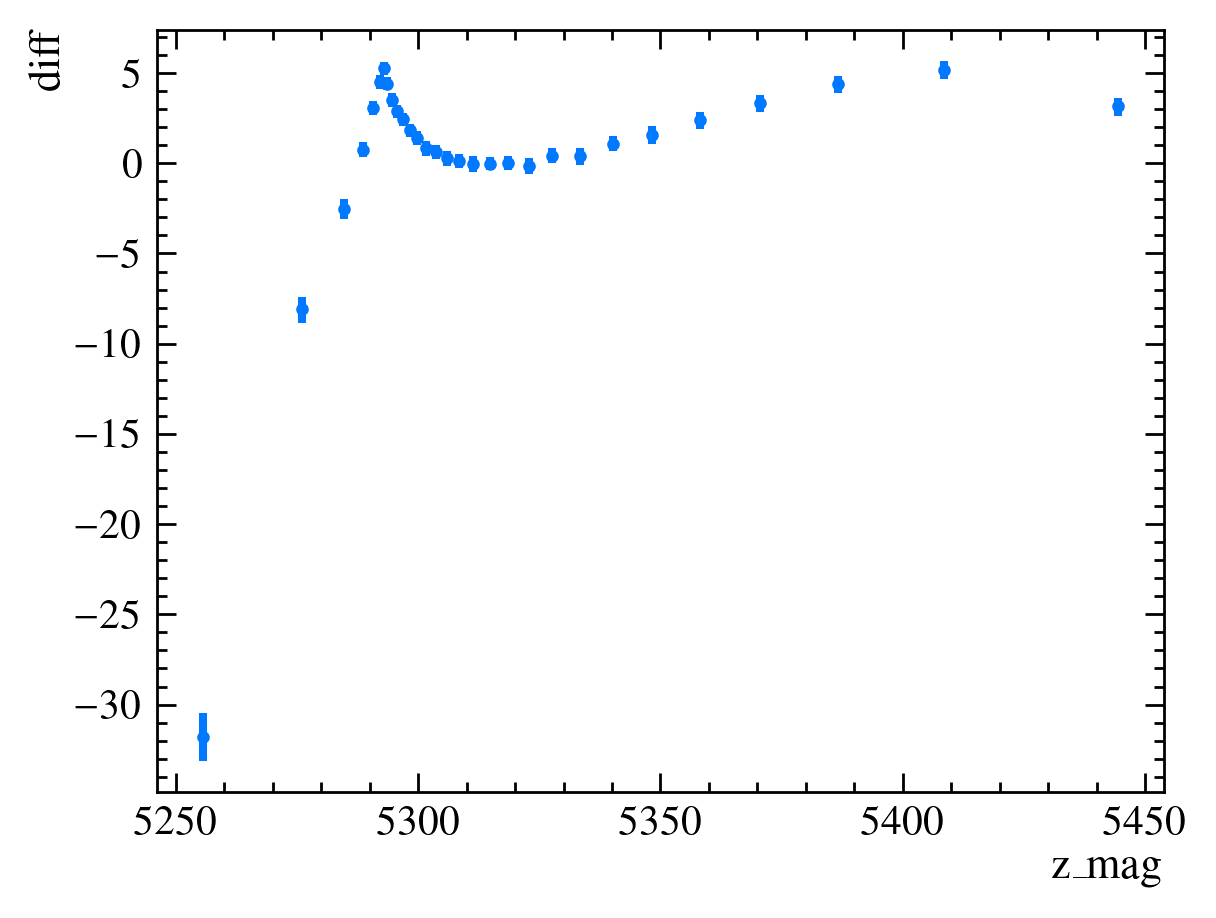

In [32]:
array = {"z_mag": zmag, "z_mag_pred": z_mag_xEndT, "diff": zmag - z_mag_xEndT}
df = pd.DataFrame(array)
sns.regplot(data=df, x="z_mag", y="diff", x_bins=30, fit_reg=False)
plt.show()